In [2]:
alpha = 10
beta = 5

function f((x1, x2))
    alpha * x1^2 + beta * x2^2
end

function grad_f((x1, x2))
    return (2 * alpha * x1, 2 * beta * x2)
end

grad_f (generic function with 1 method)

In [3]:
function g((x1k, x2k), a)
    y1k, y2k = grad_f((x1k, x2k))
    f((x1k + a * -y1k, x2k + a * -y2k))
end

function norm((x1, x2))
    sqrt(x1^2 + x2^2)
end

function dichotomy((x1k, x2k), a, b, eps)
    while true
        c = (a + b) / 2
        f0 = g((x1k, x2k), c) - g((x1k, x2k), c + eps)
        if f0 >= 0
            a = c
        else
            b = c
        end
        if b - a <= eps
            return c
        end
    end
end

dichotomy (generic function with 1 method)

In [4]:
function fastest_desc(eps)
    y_r = []
    x_r = []
    xk = (5, 5)
    push!(x_r, xk)
    yk = grad_f(xk)
    k = 0
    while true
        a = dichotomy(xk, 0.00001, 10000, min(1/abs(max(alpha, beta)), 0.001))
        xk = (xk[1] - a * yk[1], xk[2] - a * yk[2])
        push!(y_r, ( - a * yk[1], - a * yk[2]))
        yk = grad_f(xk)
        push!(x_r, xk)
        k = k + 1
        if norm(grad_f(xk)) <= eps
            return x_r, y_r, k
        end
    end
end

fastest_desc (generic function with 1 method)

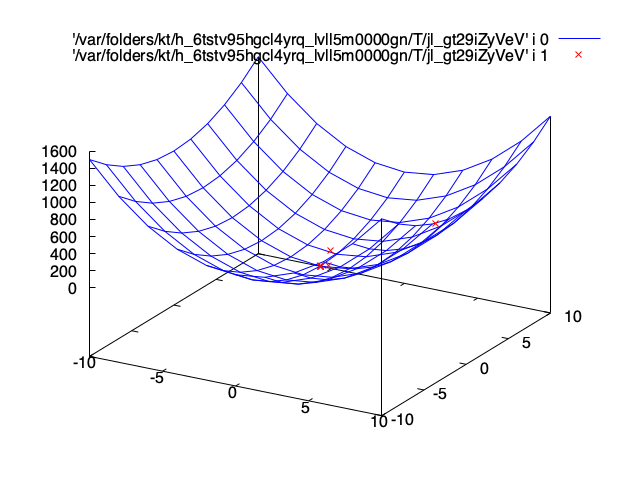

In [5]:
x_r, y_r = fastest_desc(0.01)

using Gaston

X1 = -10:2:10
X2 = -10:2:10
Z = [f((x2, x1)) for x1 in X1, x2 in X2]
surf(X2, X1, Z, lc = :blue, w = :l)

Z_P = [f(x) for x in x_r]
surf!(first.(x_r), last.(x_r), Z_P, lc = :red)

#plot(deleteat!(first.(x_r), length(x_r)), deleteat!(last.(x_r), length(x_r)), supp = [first.(y_r) last.(y_r)], w = :vectors)


In [8]:
i = 1
while i < length(x_r) - 2
    x1 = x_r[i+1][1] - x_r[i][1]
    y1 = x_r[i+1][2] - x_r[i][2]
    z1 = f(x_r[i+1]) - f(x_r[i])
    x2 = x_r[i+2][1] - x_r[i+1][1]
    y2 = x_r[i+2][2] - x_r[i+1][2]
    z2 = f(x_r[i+2]) - f(x_r[i+1])
    println("VECS: $i :: $x1, $y1, $z1, $x2, $y2, $z2")
    println(x1*x2 + y1*y2 + z1*z2)
    i += 1
end

VECS: 1 :: -5.544231958568096, -2.772115979284048, -347.22077970392394, 0.9019061668210039, -1.8460348621683114, -25.770868004164885
8948.29792779905
VECS: 2 :: 0.9019061668210039, -1.8460348621683114, -25.770868004164885, -0.3966057552302626, -0.21170603081721653, -1.8484522188411947
47.66933368074312
VECS: 3 :: -0.3966057552302626, -0.21170603081721653, -1.8484522188411947, 0.06637411564788047, -0.14503790002539774, -0.14921776502698542
0.280202950722828
VECS: 4 :: 0.06637411564788047, -0.14503790002539774, -0.14921776502698542, -0.029775311427387697, -0.013619642941360257, -0.009968297868457678
0.0014865015762320524
VECS: 5 :: -0.029775311427387697, -0.013619642941360257, -0.009968297868457678, 0.0040883102636919445, -0.010064683286589441, -0.0006730951967655444
2.205629478319835e-5
